<a href="https://colab.research.google.com/github/smabb/p/blob/master/Lesson5_Image%20Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/smabb/p/blob/master/Lesson5_Image Processing.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

|                                -                                |                                -                                |
|-----------------------------------------------------------------|-----------------------------------------------------------------|
| [Exercise 1 (to grayscale)](<#Exercise-1-(to-grayscale&#41;>) |  [Exercise 2 (radial fade)](<#Exercise-2-(radial-fade&#41;>)  |



# Image processing

An image is a collection of *pixels*, which is abbreviation for picture elements.
A grayscale image can be represented as as two dimensional array, whose first axis corresponds to the x coordinate of the image and the second axis corresponds to the y coordinate. The array contains at each coordinate pair (x,y) a value, which is typically a float between 0.0 and 1.0, or an integer between 0 and 255. This specifies the level of grayness. For example, if the array contains value 255 at coordinates (0,0), then in the image the pixel at top left is white.

In color images there is third axis is for the red, green, and blue components of each pixel. For each of these color components there is a value between 0.1 and 1.0 (or between 0 and 255). The combinations of different values for the three components red, green, and blue can result in at least 16.7 million colors.

Since images can be represented as multidimensional arrays, we can easily process images using NumPy functions. Let's see examples of these.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

(480, 640, 4)
The image consists of 307200 pixels


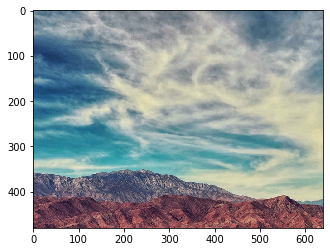

In [17]:

painting=plt.imread('https://onlinepngtools.com/images/examples-onlinepngtools/brown-mountains.png')
print(painting.shape)
print(f"The image consists of {painting.shape[0] * painting.shape[1]} pixels")
plt.imshow(painting);

Because the image is now a NumPy array, we can easily perform some operations:

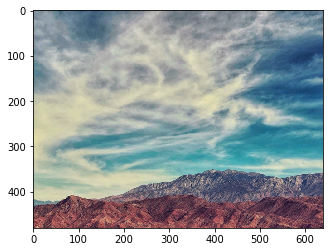

In [18]:
plt.imshow(painting[:,::-1]);              # mirror the image in x direction

In the following we set the pixels on the first 30 rows white:

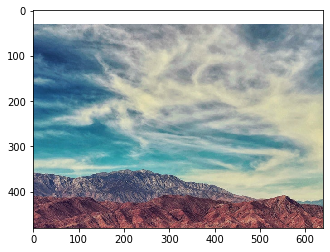

In [19]:
painting2 = painting.copy()    # don't mess the original painting!
painting2[0:30, :, :] = 1.0    # max value for all three components produces white
plt.imshow(painting2);

For a bit more complicated operation we can create a function that returns a copy of the image so that it fades to black as we move to left.

In [0]:
def fadex(image):
    height, width = image.shape[:2]
    m=np.linspace(0,1, width).reshape(1,width,1)
    result = image*m         # note that we rely on broadcasting here
    return result

(480, 640, 4)


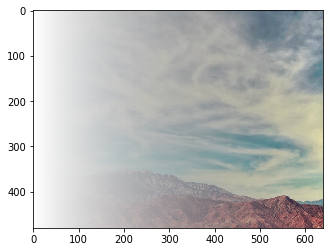

In [21]:
modified=fadex(painting)
print(modified.shape)
plt.imshow(modified);

#### <div class="alert alert-info">Exercise 1 (to grayscale)</div>

This exercise can give two points at maximum!

Part 1.

Write a function `to_grayscale` that takes an RGB image (three dimensional array) and returns a two dimensional gray-scale image. The conversion to gray-scale should take a weighted sum of the red, green, and blue values, and use that as the value of gray. The first axis is the x, the second is y, and the third is the color components (red, green, blue).
Use the weights 0.2126, 0.7152, and 0.0722 for red, green, and blue, respectively. These weights are so because the human eye is most sensitive to green color and least sensitive to blue color.

Use the provided image `https://onlinepngtools.com/images/examples-onlinepngtools/brown-mountains.png`. Display the grayscale image with the `plt.imshow` function. You may have to call the function `plt.gray` to set the color palette (colormap) to gray.
(See `help(plt.colormaps)` for more information about colormaps.)

Part 2.

Write functions `to_red`, `to_green`, and `to_blue` that get a three dimensional array as a parameter and return a three dimensional arrays. For instance, the function `to_red` should zero out the green and blue color components and return the result.Create a figure with three subfigures: the top one should be the red image, the middle one the green image, and the bottom one the blue image.
<hr/>

#### <div class="alert alert-info">Exercise 2 (radial fade)</div>

Make program that does fading of an image as earlier, except now not in horizontal direction but in radial direction. As we move away from the centre of the image, the pixels fade to black.

Part1.

Write function `center` that returns coordinate pair (center_y, center_x) of the image center. Note that these coordinates might not be integers. Example of usage:
```python
print(center(np.zeros((10, 11, 3))))
(4.5, 5)
```
The function should work both for two and three dimensional images, that is grayscale and color images.

Write also function `radial_distance` that returns for image with width `w` and height `h` an array with shape (h,w), where the number at index (i,j) gives the euclidean distance from the point (i,j) to the center of the image.

Part 2.

Create function `scale(a, tmin=0.0, tmax=1.0)` that returns a copy of the array `a` with its elements scaled to be in the range `[tmin,tmax]`.

Using the functions `radial_distance` and `scale` write function `radial_mask` that takes an image as a parameter and returns an array with same height and width filled with values between 0.0 and 1.0. Do this using the `scale` function.  To make the resulting array values near the center of array to be close to 1 and closer to the edges of the array are values closer to be 0, subtract the previous array from 1.

Write also function `radial_fade` that returns the image multiplied by its radial mask.

Create, using matplotlib, a figure that has three subfigures stacked vertically. On top the original `https://onlinepngtools.com/images/examples-onlinepngtools/brown-mountains.png`, in the middle the mask, and on the bottom the faded image.
<hr/>

### Finding clusters in an image

Let's first generate some data:

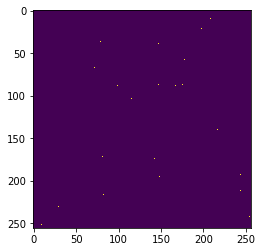

In [22]:
n=5
l=256
im = np.zeros((l,l))
np.random.seed(0)
points = np.random.randint(0, l, (2, n**2))  # sample n*n pixels from the array im
im[points[0], points[1]] = 1
plt.imshow(im);

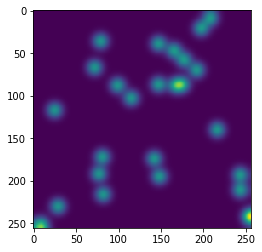

In [23]:
from scipy import ndimage
im2 = ndimage.gaussian_filter(im, sigma=l/(8.*n))  # blur the image a bit
plt.imshow(im2);

Let's try to find clusters from the above image:

Number of clusters is 12


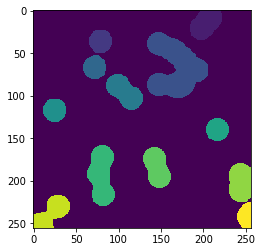

In [24]:
mask = im2 > im2.mean()     # mask those pixels whose intensity is above mean
label_im, nb_labels = ndimage.label(mask)   # connected components form clusters
print(f"Number of clusters is {nb_labels}")
plt.imshow(label_im);

Although this method we used was very simple, it could still be used for example to automatically count number of birds or stars in an image. Of course, humans can do this easily, but when there are hundreds or thousands of images, then it is better to use machines to do this mechanical work.

There is large number of applications of image processing of which we list only a few here:

* denoising
* deblurring
* image segmentation
* feature extraction
* zooming, rotating
* filtering

## Additional libraries

The are several libraries written in Python that allow easy processing of images. Few examples of these:

* [pillow](https://python-pillow.org/)
* [scikit-image](https://scikit-image.org/)
* In Scipy there is the subpackage [ndimage](https://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html) that also contains routines for processing images

##Summary
* You know the building blocks of matplotlib's figures. You can create figures based on NumPy arrays and you can adjust the attributes of figures
* You understand how images are organized as NumPy arrays. You can manipulate images using Numpy's array operations.